<a href="https://colab.research.google.com/github/dannnn30/data-mining-_-daniel/blob/main/Exercise_Week_3_Pandas_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Week 3**

**DATASET** <br>
*   Download the **MBA dataset** from Elearn
*   Upload the dataset to your own Github
*   Import the dataset using URL from your Github


<br>

**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [ ]:

#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

NAMA : DANIEL YOHANIS OEMATAN
NIM : 0706022210060

1. display 5 columns from dataset

In [ ]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/dannnn30/data-mining-_-daniel/refs/heads/main/MBA.csv')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [ ]:
#2
df.info()
#conclusion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [ ]:
#3a
df['admission'].value_counts(dropna=False)

NaN         5194
Admit        900
Waitlist     100
Name: admission, dtype: int64

In [ ]:
#3b
df['race'].value_counts(dropna=False)

NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: race, dtype: int64

4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [ ]:
#4
df['admission'].fillna("deny", inplace=True)
df['race'].fillna("other", inplace=True)

5. recheck missing value

In [ ]:
#5
df.isnull().sum()

application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64

6. drop application_id column

In [ ]:
# 6
df=df.drop(['application_id'], axis=1)

7. show describe column and conclude what the insight is from that column

In [ ]:
#7
df.describe()
#conclusion


,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

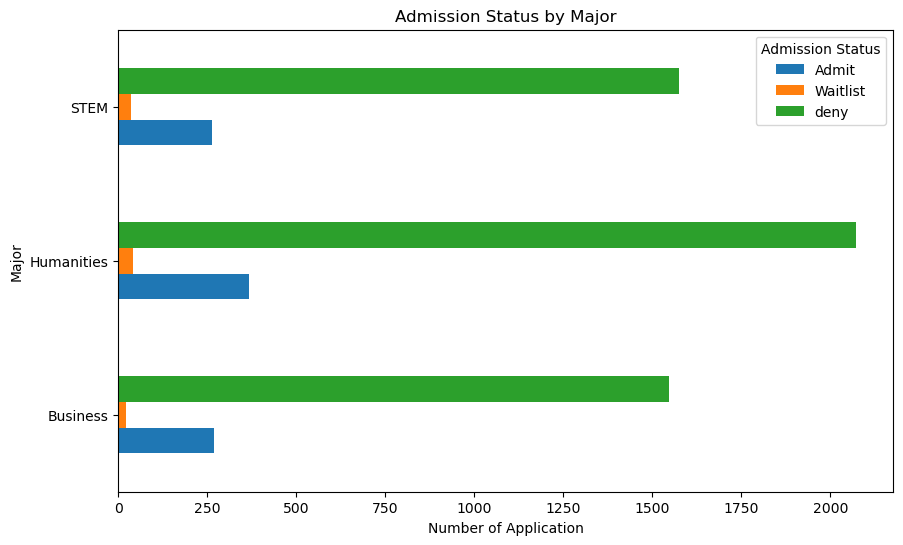

In [ ]:
#8
count_admission_by_major = df.groupby(['major','admission']).size().unstack()
count_admission_by_major.plot (kind='barh',figsize=(10,6))
plt.title('Admission Status by Major')
plt.xlabel('Number of Application')
plt.ylabel('Major')
plt.legend(title='Admission Status')
plt.show()


9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

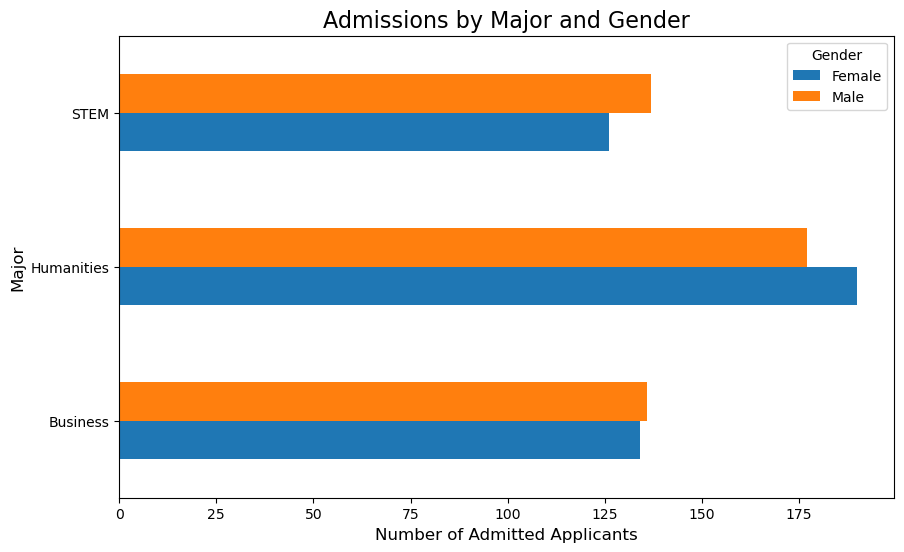

In [ ]:
#9

# Filter the DataFrame to include only admitted applicants
df_admitted = df[df['admission'] == 'Admit']

# Group data by major and gender, then count the occurrences
grouped_data = df_admitted.groupby(['major','gender']).size().unstack()
# Create a horizontal bar chart
grouped_data.plot(kind='barh', figsize=(10, 6))
# Customize the chart
plt.title('Admissions by Major and Gender', fontsize=16)
plt.xlabel('Number of Admitted Applicants', fontsize=12)
plt.ylabel('Major', fontsize=12)
plt.legend(title='Gender')



# Show the chart

plt.show()

10. create your own insightful visualization and explain it in at least 2 sentences

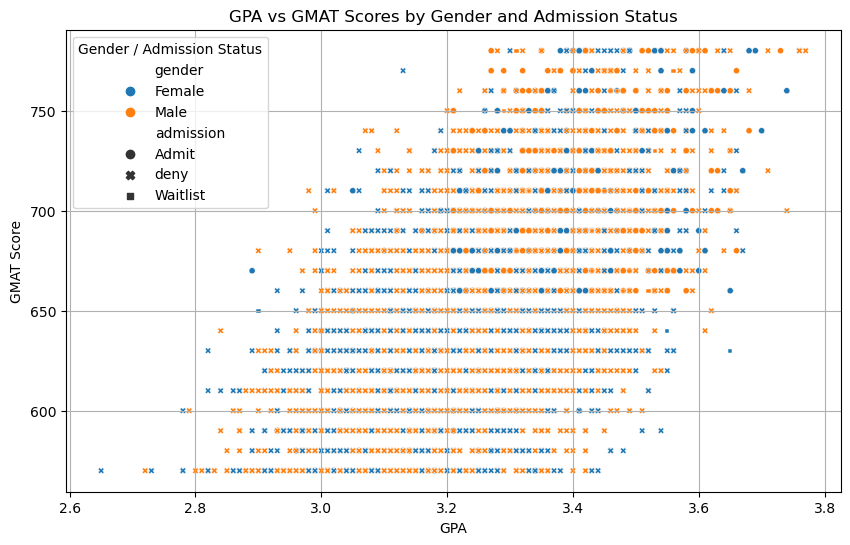

Dalam visualisasi ini, plot sebar menggambarkan bagaimana GPA dan skor GMAT terdistribusi di antara berbagai gender dan status penerimaan. Dengan membedakan gender menggunakan warna yang berbeda dan menggunakan penanda untuk menunjukkan hasil penerimaan, kita dapat memperoleh wawasan tentang pola keberhasilan akademis dan penerimaan di pendidikan tinggi.


In [ ]:
#10
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gpa', y='gmat', hue='gender', style='admission', s=20)
plt.title('GPA vs GMAT Scores by Gender and Admission Status')
plt.xlabel('GPA')
plt.ylabel('GMAT Score')
plt.legend(title='Gender / Admission Status')
plt.grid(True)
plt.show()

print("Dalam visualisasi ini, plot sebar menggambarkan bagaimana GPA dan skor GMAT terdistribusi di antara berbagai gender dan status penerimaan. Dengan membedakan gender menggunakan warna yang berbeda dan menggunakan penanda untuk menunjukkan hasil penerimaan, kita dapat memperoleh wawasan tentang pola keberhasilan akademis dan penerimaan di pendidikan tinggi.")

11. create your own insightful visualization and explain it in at least 2 sentences

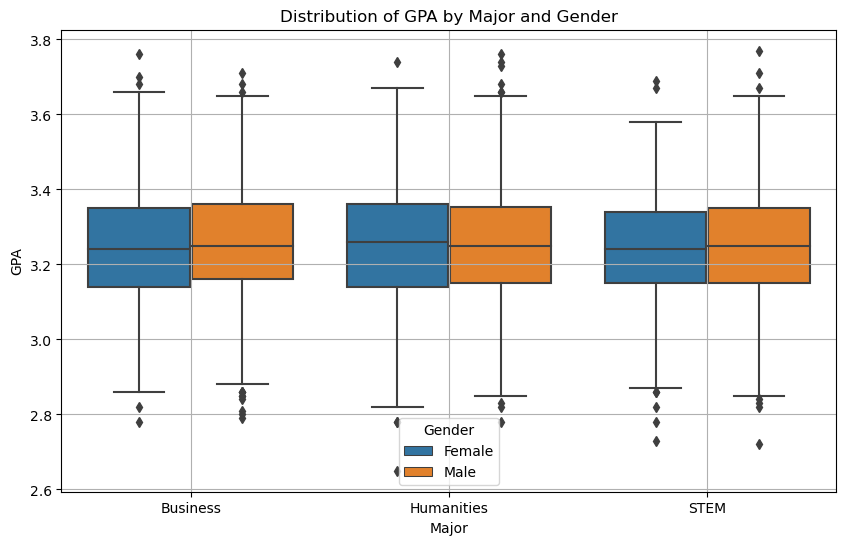

Dalam visualisasi ini, plot kotak mengungkapkan bagaimana GPA bervariasi di antara berbagai jurusan, dipisahkan berdasarkan gender. Dengan memeriksa kuartil dan kemungkinan pencilan, kita dapat mengidentifikasi tren yang menunjukkan apakah gender tertentu tampil lebih baik di bidang tertentu, memberikan wawasan berharga bagi penasihat akademis dan institusi dalam memahami dinamika gender dalam pendidikan.


In [ ]:
#11
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='major', y='gpa', hue='gender')
plt.title('Distribution of GPA by Major and Gender')
plt.xlabel('Major')
plt.ylabel('GPA')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

print("Dalam visualisasi ini, plot kotak mengungkapkan bagaimana GPA bervariasi di antara berbagai jurusan, dipisahkan berdasarkan gender. Dengan memeriksa kuartil dan kemungkinan pencilan, kita dapat mengidentifikasi tren yang menunjukkan apakah gender tertentu tampil lebih baik di bidang tertentu, memberikan wawasan berharga bagi penasihat akademis dan institusi dalam memahami dinamika gender dalam pendidikan.")

12. encode categorical columns and display the results

In [ ]:
#12
# Encode gender
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

# Encode international
df['international'] = df['international'].map({False: 0, True: 1})

# Encode major
major_mapping = {major: idx for idx, major in enumerate(df['major'].unique())}
df['major'] = df['major'].map(major_mapping)

# Encode race
race_mapping = {race: idx for idx, race in enumerate(df['race'].unique())}
df['race'] = df['race'].map(race_mapping)

# Encode work_industry
work_industry_mapping = {industry: idx for idx, industry in enumerate(df['work_industry'].unique())}
df['work_industry'] = df['work_industry'].map(work_industry_mapping)

# Encode categorical columns (except the admission column)
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,0,Admit
1,1,0,3.28,1,1,680.0,5.0,1,deny
2,0,1,3.30,0,2,710.0,5.0,2,Admit
3,1,0,3.47,2,1,690.0,6.0,2,deny
4,1,0,3.35,2,3,590.0,5.0,3,deny


In [ ]:
# Encode the admission column
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['admission']= label_encoder.fit_transform(df['admission'])

df['admission'].unique()
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,0,0
1,1,0,3.28,1,1,680.0,5.0,1,2
2,0,1,3.30,0,2,710.0,5.0,2,0
3,1,0,3.47,2,1,690.0,6.0,2,2
4,1,0,3.35,2,3,590.0,5.0,3,2


13. create a heatmap to see the correlation and explain the conclusion

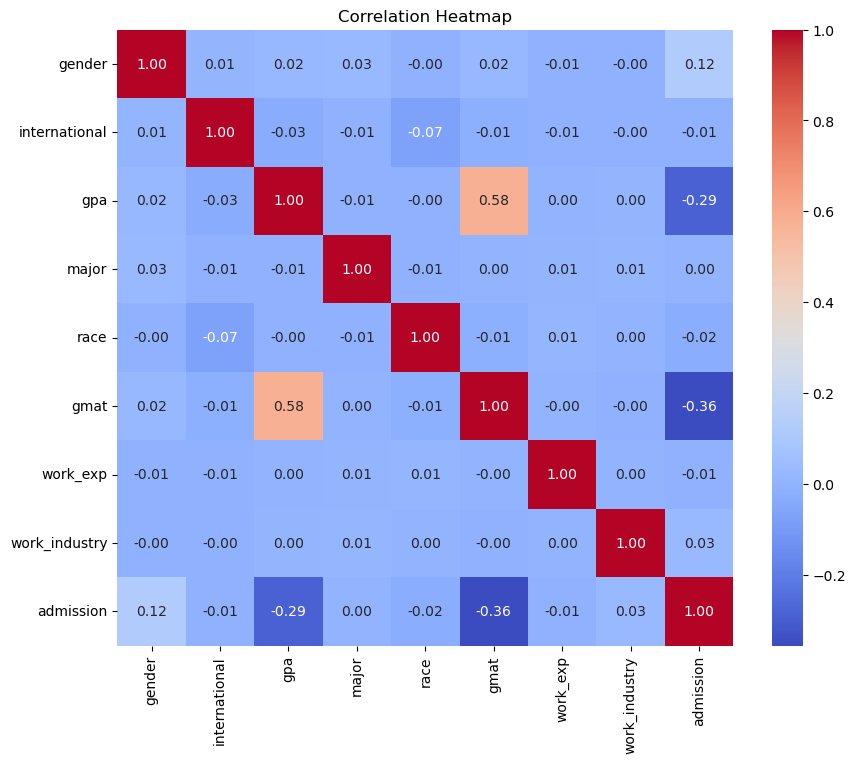

In [ ]:
#13

# Calculate the correlation matrix
correlation_matrix = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)

# Add title
plt.title('Correlation Heatmap')
plt.show()


**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [ ]:
# prompt: make a model classification

# Separate features and target variable

# Split the data into training and testing sets

# Create a Decision Tree Classifier

# Train the model

# Make predictions on the test set

# Evaluate the model


Accuracy: 0.7828894269572235


In [ ]:
# Get the average GPA

# Create Lisa's data as a dictionary

# Create a DataFrame with Lisa's data

# Encode categorical features for Lisa's data

# Make a prediction using the trained model

# Decode the prediction back to the original label


Prediction for Lisa's admission: Finance
